# Voice Transformer

In [3]:
import numpy as np
import IPython

from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
Fs, s = wavfile.read('speech.wav')
s = s / np.max(np.abs(s))
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

sampling rate: 16000Hz


In [11]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)  # positive frequencies only
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    return N, X

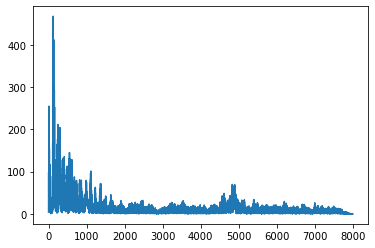

In [13]:
plot_spec(s, Fs, 8000);

In [14]:
def alien_voice(x, mod_freq, Fs):
    w = (float(mod_freq) / Fs) * 2 * np.pi  # normalized modulation frequency
    return 2 * np.multiply(x, np.cos(w * np.arange(0,len(x))))

IPython.display.Audio(alien_voice(s, 500, Fs), rate=Fs)

In [ ]:
plot_spec(alien_voice(s, 500, Fs), Fs, 8000);